In [88]:
# importing the packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns

%matplotlib inline

# BUSINESS PROBLEM-1
###       BACKGROUND: The Lending Club is a peer-to-peer lending site where members make loans to
###       each other. The site makes anonymized data on loans and borrowers publicly available.
###       BUSINESS PROBLEM:
####     Using lending club loans data, the team would like to test below hypothesis on how different
####     factors effecing each other (Hint: You may leverage hypothesis testing using statistical tests)
#### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan
#### amounts)
#### b. Loan length is directly effecting intrest rate.
#### c. Inrest rate varies for different purpose of loans
#### d. There is relationship between FICO scores and Home Ownership. It means that, People
#### with owning home will have high FICO scores.

In [89]:
LoansData = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 5 - Basic Statistics - Hypothesis Testing/LoansData.csv")

In [90]:
LoansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [91]:
LoansData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2500 entries, 0 to 2499
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Amount.Requested                2499 non-null   float64
 1   Amount.Funded.By.Investors      2499 non-null   float64
 2   Interest.Rate                   2498 non-null   object 
 3   Loan.Length                     2500 non-null   object 
 4   Loan.Purpose                    2500 non-null   object 
 5   Debt.To.Income.Ratio            2499 non-null   object 
 6   State                           2500 non-null   object 
 7   Home.Ownership                  2499 non-null   object 
 8   Monthly.Income                  2499 non-null   float64
 9   FICO.Range                      2498 non-null   object 
 10  Open.CREDIT.Lines               2497 non-null   float64
 11  Revolving.CREDIT.Balance        2497 non-null   float64
 12  Inquiries.in.the.Last.6.Months  24

### a. Intrest rate is varied for different loan amounts (Less intrest charged for high loan amounts)

In [92]:
LoansData['Interest.Rate'].value_counts()

12.12%    122
7.90%     119
13.11%    115
15.31%     76
14.09%     72
         ... 
16.71%      1
23.33%      1
16.69%      1
17.54%      1
15.45%      1
Name: Interest.Rate, Length: 275, dtype: int64

In [93]:
LoansData['Amount.Requested'].value_counts()

10000.0    206
12000.0    151
5000.0     110
20000.0    107
6000.0     103
          ... 
31050.0      1
4350.0       1
1950.0       1
8975.0       1
7575.0       1
Name: Amount.Requested, Length: 380, dtype: int64

In [94]:
LoansData.nunique()

Amount.Requested                   380
Amount.Funded.By.Investors         710
Interest.Rate                      275
Loan.Length                          2
Loan.Purpose                        14
Debt.To.Income.Ratio              1669
State                               46
Home.Ownership                       5
Monthly.Income                     632
FICO.Range                          38
Open.CREDIT.Lines                   29
Revolving.CREDIT.Balance          2349
Inquiries.in.the.Last.6.Months      10
Employment.Length                   11
dtype: int64

In [95]:
LoansData.groupby('Interest.Rate')['Amount.Requested'].mean()

Interest.Rate
10.00%     9725.000000
10.08%    15700.000000
10.16%    11615.957447
10.20%     3000.000000
10.25%    14406.250000
              ...     
9.63%     10027.272727
9.76%      9814.285714
9.88%     10487.500000
9.91%     14315.384615
9.99%      9654.545455
Name: Amount.Requested, Length: 275, dtype: float64

In [96]:
LoansData.describe()

,Amount.Requested,Amount.Funded.By.Investors,Monthly.Income,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months
count,2499.000000,2499.000000,2499.000000,2497.000000,2497.000000,2497.000000
mean,12405.462185,12002.374186,5688.931321,10.072887,15223.184622,0.906688
std,7802.933666,7746.767348,3963.118185,4.507416,18281.015258,1.231149
min,1000.000000,-0.010000,588.500000,2.000000,0.000000,0.000000
25%,6000.000000,6000.000000,3500.000000,7.000000,5584.000000,0.000000
50%,10000.000000,10000.000000,5000.000000,9.000000,10948.000000,0.000000
75%,17000.000000,16000.000000,6800.000000,13.000000,18861.000000,1.000000
max,35000.000000,35000.000000,102750.000000,38.000000,270800.000000,9.000000


In [97]:
LoansData.isna().sum()

Amount.Requested                   1
Amount.Funded.By.Investors         1
Interest.Rate                      2
Loan.Length                        0
Loan.Purpose                       0
Debt.To.Income.Ratio               1
State                              0
Home.Ownership                     1
Monthly.Income                     1
FICO.Range                         2
Open.CREDIT.Lines                  3
Revolving.CREDIT.Balance           3
Inquiries.in.the.Last.6.Months     3
Employment.Length                 77
dtype: int64

In [98]:
LoansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [99]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [100]:
catagorical_col = ['Interest.Rate','Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State','Home.Ownership',
                   'FICO.Range', 'Open.CREDIT.Lines','Inquiries.in.the.Last.6.Months', 'Employment.Length' ]
continious_col = ['Amount.Requested', 'Amount.Funded.By.Investors', 'Monthly.Income','Revolving.CREDIT.Balance']

In [101]:
for col in catagorical_col:
    LoansData[col] = LoansData[col].fillna(LoansData[col].mode()[0])
LoansData[continious_col] = LoansData[continious_col].fillna(LoansData[continious_col].mean())
LoansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90%,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12%,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98%,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99%,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71%,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [102]:
LoansData.isna().sum()

Amount.Requested                  0
Amount.Funded.By.Investors        0
Interest.Rate                     0
Loan.Length                       0
Loan.Purpose                      0
Debt.To.Income.Ratio              0
State                             0
Home.Ownership                    0
Monthly.Income                    0
FICO.Range                        0
Open.CREDIT.Lines                 0
Revolving.CREDIT.Balance          0
Inquiries.in.the.Last.6.Months    0
Employment.Length                 0
dtype: int64

In [103]:
LoansData['Interest.Rate'] = (LoansData['Interest.Rate'].str.strip('%').astype(float))

In [104]:
stats.pearsonr( LoansData['Interest.Rate'], LoansData['Amount.Requested'] )

(0.3324094611990564, 1.4646809963138709e-65)

### b. Loan length is directly effecting intrest rate.

In [105]:
LoansData.columns

Index(['Amount.Requested', 'Amount.Funded.By.Investors', 'Interest.Rate',
       'Loan.Length', 'Loan.Purpose', 'Debt.To.Income.Ratio', 'State',
       'Home.Ownership', 'Monthly.Income', 'FICO.Range', 'Open.CREDIT.Lines',
       'Revolving.CREDIT.Balance', 'Inquiries.in.the.Last.6.Months',
       'Employment.Length'],
      dtype='object')

In [106]:
LoansData['Loan.Length'].nunique()

2

In [107]:
LoansData.head()

,Amount.Requested,Amount.Funded.By.Investors,Interest.Rate,Loan.Length,Loan.Purpose,Debt.To.Income.Ratio,State,Home.Ownership,Monthly.Income,FICO.Range,Open.CREDIT.Lines,Revolving.CREDIT.Balance,Inquiries.in.the.Last.6.Months,Employment.Length
0,20000.0,20000.0,8.90,36 months,debt_consolidation,14.90%,SC,MORTGAGE,6541.67,735-739,14.0,14272.0,2.0,< 1 year
1,19200.0,19200.0,12.12,36 months,debt_consolidation,28.36%,TX,MORTGAGE,4583.33,715-719,12.0,11140.0,1.0,2 years
2,35000.0,35000.0,21.98,60 months,debt_consolidation,23.81%,CA,MORTGAGE,11500.00,690-694,14.0,21977.0,1.0,2 years
3,10000.0,9975.0,9.99,36 months,debt_consolidation,14.30%,KS,MORTGAGE,3833.33,695-699,10.0,9346.0,0.0,5 years
4,12000.0,12000.0,11.71,36 months,credit_card,18.78%,NJ,RENT,3195.00,695-699,11.0,14469.0,0.0,9 years


In [108]:
LoansData['Loan.Length'].value_counts()

36 months    1952
60 months     548
Name: Loan.Length, dtype: int64

In [109]:
usage = 'Interest.Rate'

In [110]:
# data processing for the test
s1 = LoansData.loc[ LoansData['Loan.Length'] == '36 months', usage ]
s2 = LoansData.loc[ LoansData['Loan.Length'] == '60 months', usage ]

print( 'mean s1:', s1.mean(), '| mean s2:', s2.mean() )

mean s1: 12.126173155737813 | mean s2: 16.40746350364961


In [111]:
stats.f_oneway( s1, s2)

F_onewayResult(statistic=548.3261736091927, pvalue=8.529143234124184e-110)

### c. Inrest rate varies for different purpose of loans

In [112]:
obs_freq = pd.crosstab( LoansData['Interest.Rate'], LoansData['Loan.Purpose'] )

In [113]:
obs_freq.T

Interest.Rate,5.42,5.79,5.99,6.00,6.03,6.17,6.54,6.62,6.76,6.91,...,23.28,23.33,23.63,23.76,23.83,23.91,24.20,24.33,24.70,24.89
Loan.Purpose,,,,,,,,,,,,,,,,,,,,,
car,0,1,0,0,3,0,0,3,0,1,...,0,0,0,0,0,0,0,0,0,0
credit_card,2,2,1,0,7,0,1,11,0,1,...,1,0,0,1,0,0,0,0,1,0
debt_consolidation,0,5,4,0,24,1,3,24,2,5,...,3,1,1,5,2,1,1,1,1,1
educational,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
home_improvement,5,2,3,1,5,1,1,4,0,0,...,0,0,0,0,0,0,0,0,0,0
house,0,0,1,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
major_purchase,1,1,1,0,6,2,0,2,0,1,...,0,0,0,0,0,0,0,0,0,0
medical,1,0,0,0,2,0,1,1,0,0,...,1,0,0,0,0,0,0,0,0,0
moving,0,1,0,0,0,1,0,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [114]:
stats.chi2_contingency( obs_freq.T )

(4378.952129804514,
 8.396099408489274e-20,
 3562,
 array([[0.22  , 0.28  , 0.2   , ..., 0.02  , 0.04  , 0.04  ],
        [1.9536, 2.4864, 1.776 , ..., 0.1776, 0.3552, 0.3552],
        [5.7508, 7.3192, 5.228 , ..., 0.5228, 1.0456, 1.0456],
        ...,
        [0.3828, 0.4872, 0.348 , ..., 0.0348, 0.0696, 0.0696],
        [0.0924, 0.1176, 0.084 , ..., 0.0084, 0.0168, 0.0168],
        [0.1716, 0.2184, 0.156 , ..., 0.0156, 0.0312, 0.0312]]))

### d. There is relationship between FICO scores and Home Ownership. It means that, People
### with owning home will have high FICO scores.

In [115]:
obs_freq_1 = pd.crosstab( LoansData['Home.Ownership'], LoansData['FICO.Range'] )

In [116]:
obs_freq_1

FICO.Range,640-644,645-649,650-654,655-659,660-664,665-669,670-674,675-679,680-684,685-689,...,780-784,785-789,790-794,795-799,800-804,805-809,810-814,815-819,820-824,830-834
Home.Ownership,,,,,,,,,,,,,,,,,,,,,
MORTGAGE,0,1,1,0,41,52,68,79,55,61,...,21,12,15,7,7,6,5,6,0,1
NONE,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
OTHER,0,0,0,1,0,0,1,1,2,0,...,0,0,0,0,0,0,0,0,0,0
OWN,1,0,0,0,17,18,13,11,9,10,...,3,2,1,1,3,2,1,0,1,0
RENT,4,2,0,3,67,75,91,75,91,65,...,4,5,4,5,2,3,2,0,0,0


In [117]:
stats.chi2_contingency( obs_freq_1 )

(473.5648028168521,
 1.0065160858471904e-35,
 148,
 array([[2.29600e+00, 1.37760e+00, 4.59200e-01, 1.83680e+00, 5.74000e+01,
         6.65840e+01, 7.94416e+01, 7.62272e+01, 7.20944e+01, 6.24512e+01,
         6.42880e+01, 7.02576e+01, 6.01552e+01, 6.15328e+01, 5.14304e+01,
         4.27056e+01, 5.23488e+01, 4.31648e+01, 4.31648e+01, 2.98480e+01,
         2.43376e+01, 2.47968e+01, 2.80112e+01, 2.11232e+01, 2.11232e+01,
         1.65312e+01, 7.80640e+00, 1.01024e+01, 1.28576e+01, 8.72480e+00,
         9.18400e+00, 5.96960e+00, 5.96960e+00, 5.05120e+00, 3.67360e+00,
         2.75520e+00, 4.59200e-01, 4.59200e-01],
        [2.00000e-03, 1.20000e-03, 4.00000e-04, 1.60000e-03, 5.00000e-02,
         5.80000e-02, 6.92000e-02, 6.64000e-02, 6.28000e-02, 5.44000e-02,
         5.60000e-02, 6.12000e-02, 5.24000e-02, 5.36000e-02, 4.48000e-02,
         3.72000e-02, 4.56000e-02, 3.76000e-02, 3.76000e-02, 2.60000e-02,
         2.12000e-02, 2.16000e-02, 2.44000e-02, 1.84000e-02, 1.84000e-02,
         1.4

## BUSINESS PROBLEM - 2
BACKGROUND: When an order is placed by a customer of a small manufacturing company, a
price quote must be developed for that order. Because each order is unique, quotes must be
established on an order-by-order basis by a pricing expert. The price quote process is laborintensive,
as prices depend on many factors such as the part number, customer, geographic
location, market, and order volume. The sales department manager is concerned that the pricing
process is too complex, and that there might be too much variability in the quoted prices. An
improvement team is tasked with studying and improving the pricing process.

After interviewing experts to develop a better understanding of the current process, the team
designed a study to determine if there is variability between pricing experts. That is, do different
pricing experts provide different price quotes? Two randomly selected pricing experts, Mary and
Barry, were asked to independently provide prices for twelve randomly selected orders. Each
expert provided one price for each of the twelve orders.

### BUSINESS PROBLEM: 
We would like to assess if there is any difference in the average
price quotes provided by Mary and Barry.

### DATA AVAILABLE:
### Price_Quotes.csv
The data set contains the order number, 1 through 12, and the price quotes by Mary
and Barry for each order. Each row in the data set is the same order. Thus, Mary and
Barry produced quotes for the same orders.

In [118]:
Price_Quotes = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 5 - Basic Statistics - Hypothesis Testing/Price_Quotes.csv")

In [119]:
Price_Quotes

,Order_Number,Barry_Price,Mary_Price
0,1,126,114
1,2,110,118
2,3,138,114
3,4,142,111
4,5,146,129
5,6,136,119
6,7,94,97
7,8,103,104
8,9,140,127
9,10,152,133


In [120]:
Barry_Price_mean = Price_Quotes.Barry_Price.mean()
Mary_Price_mean = Price_Quotes.Mary_Price.mean()
print( 'mean of Barry_Price:', Price_Quotes.Barry_Price.mean() )
print( 'mean of Mary_Price:', Price_Quotes.Mary_Price.mean() )

mean of Barry_Price: 124.33333333333333
mean of Mary_Price: 114.75


In [121]:
stats.ttest_rel( Price_Quotes.Barry_Price, Price_Quotes.Mary_Price )

Ttest_relResult(statistic=2.521376510892349, pvalue=0.02840588045242053)

## BUSINESS PROBLEM-3:
BACKGROUND: The New Life Residential Treatment Facility is a NGO that treats teenagers who
have shown signs of mental illness. It provides housing and supervision of teenagers who are
making the transition from psychiatric hospitals back into the community. Because many of
the teenagers were severely abused as children and have been involved with the juvenile
justice system, behavioral problems are common at New Life. Employee pay is low and staff
turnover (attrition) is high.

A reengineering program was instituted at New Life with the goals of lowering behavioral
problems of the kids and decreasing employee turnover rates. As a part of this effort, the
following changes were made:
        
 Employee shifts were shortened from 10 hours to 8 hours each day.

 Employees were motivated to become more involved in patient treatments. This
included encouraging staff to run various therapeutic treatment sessions and allowing
staff to have more say in program changes.

 The activities budget was increased.

 A facility-wide performance evaluation system was put into place that rewarded staff
participation and innovation.

 Management and staff instituted a program designed to raise expectations about
appropriate behavior from the kids. This included strict compliance with reporting of
behavioral violations, insistence on participation in therapeutic sessions, and a
lowered tolerance for even moderate behavioral infractions.

To determine the effectiveness of the reengineering effort, a data set comprised of pre- and
post-reengineering periods was compiled. The information contains two measures of
behavioral problems. A critical incident occurs when a resident goes AWOL (leaves the
premises without permission), destroys property (e.g., punching a hole in a wall or throwing
furniture through windows), is caught in possession of street drugs, or engages in assault
against other residents or staff members. A teenager is temporarily removed from the facility
when s/he is sent to jail or back to a psychiatric hospital

BUSINESS PROBLEM: Determine what effect, if any, the reengineering effort had on the
incidence behavioral problems and staff turnover. i.e To determine if the reengineering effort
changed the critical incidence rate. Is there evidence that the critical incidence rate
improved?

### DATA AVAILABLE: Treatment_Facility.csv
The data set contains 20 months of data; the first 13 months were prior to reengineering. The
variables in the data include:
- Reengineer: Whether the month was before (Prior) or after (Post) reengineering

- Employee Turnover: The percentage of employees who quit in a given
month, out of the total number of employees

- TRFF(%): The percentage of residents who were temporarily removed from
the facility, out of the total number of residents

- CI (%): The percentage of critical incident reports written that month, out of
the total number of residents

In [122]:
Treatment_Facility = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 5 - Basic Statistics - Hypothesis Testing/Treatment_Facility.csv")

In [123]:
Treatment_Facility

,Month,Reengineer,Employee_Turnover,VAR4,VAR5
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096
5,6,Prior,9.6774,41.176471,47.058824
6,7,Prior,11.7647,13.422819,0.000000
7,8,Prior,11.4286,31.250000,25.000000
8,9,Prior,23.0769,17.241379,132.183908
9,10,Prior,15.0000,16.574586,16.574586


In [124]:
Treatment_Facility.Reengineer.value_counts()

Prior    13
Post      7
Name: Reengineer, dtype: int64

In [125]:
usage = 'Employee_Turnover'

Prior_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer: ', Prior_Reengineer.mean(), '| mean of Post_Reengineer: ', Post_Reengineer.mean() )

mean of Prior_Reengineer:  11.735692307692307 | mean of Post_Reengineer:  18.68912857142857


### - To determine if the reengineering effort changed the critical incidence rate

In [126]:
stats.ttest_ind( Prior_Reengineer, Post_Reengineer )

Ttest_indResult(statistic=-1.770306704753604, pvalue=0.09361109345535304)

In [127]:
stats.f_oneway( Prior_Reengineer, Post_Reengineer )

F_onewayResult(statistic=3.133985828895568, pvalue=0.09361109345535291)

### - Is there evidence that the critical incidence rate improved?

In [128]:
Treatment_Facility.rename(columns = {'VAR4':'TRFF', 'VAR5':'CI'}, inplace = True)

In [129]:
Treatment_Facility.head()

,Month,Reengineer,Employee_Turnover,TRFF,CI
0,1,Prior,0.0000,24.390244,42.682927
1,2,Prior,6.0606,19.354839,25.806452
2,3,Prior,12.1212,35.087719,146.198830
3,4,Prior,3.3333,18.404908,110.429448
4,5,Prior,12.9032,17.964072,23.952096


In [130]:
usage = 'CI'

Prior_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Prior', usage ]
Post_Reengineer_CI = Treatment_Facility.loc[ Treatment_Facility.Reengineer == 'Post', usage ]

print( 'mean of Prior_Reengineer_CI : ', Prior_Reengineer_CI.mean(), '| mean of Post_Reengineer_CI : ', Post_Reengineer_CI.mean() )

mean of Prior_Reengineer_CI :  53.887906321846145 | mean of Post_Reengineer_CI :  23.34971927988571


In [131]:
stats.f_oneway( Prior_Reengineer_CI, Post_Reengineer_CI )

F_onewayResult(statistic=2.650105376271948, pvalue=0.12091989189884142)

## BUSINESS PROBLEM-4
BACKGROUND: Software development projects typically follow six basic phases: Requirements,
design, implementation (and integration), testing (validation), deployment (installation) and
maintenance. First, general requirements are gathered, and the scope of the functionality is
defined. Then, alternative scenarios for the required functionality are developed and
evaluated. Implementation, usually 50% or more of the development time, is the phase in
which the design is translated into programs and integrated with other parts of the software –
this is when software engineers actually develop the code. During the final phases, programs
are tested, software is put into use, and faults or performance issues are addressed.

ApDudes, a developer of applications for tablet computers, was having difficulty meeting
project deadlines; only 10% of their projects had been completed within budget and on time
last year and that was starting to hurt business. The group’s project manager was tasked with
studying problems within the implementation phase. He found that software engineers were
having difficulty prioritizing their work, and that they often became overwhelmed by the
magnitude of the projects.

As a result, two changes were made. Each project was broken down into smaller, distinct
tasks, or jobs, and each job was assigned a priority. The project manager believes that this
classification and prioritization system would speed the completion of high priority jobs, and
thus lower overall project completion time

### BUSINESS PROBLEM: 
We will focus on the prioritization system. If the system is working, then
high priority jobs, on average, should be completed more quickly than medium priority jobs,
and medium priority jobs should be completed more quickly than low priority jobs. Use the
data provided to determine whether this is, in fact, occurring.

DATA AVAILABLE:
- Priority_Assessment.csv
The data set contains a random sample of 642 jobs completed over the last six months. The
variables in the data set are:
- Days                     The number of days it took to complete the job
- Priority                 The priority level assigned to that job

In [132]:
Priority_Assessment = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 5 - Basic Statistics - Hypothesis Testing/Priority_Assessment.csv")

In [133]:
Priority_Assessment

,Days,Priority
0,3.3,High
1,7.9,Medium
2,0.3,High
3,0.7,Medium
4,8.6,Medium
...,...,...
637,2.5,Low
638,0.3,High
639,0.3,Medium
640,1.3,Medium


In [134]:
Priority_Assessment.Priority.value_counts()

High      326
Medium    249
Low        67
Name: Priority, dtype: int64

In [135]:
Priority_Assessment.Priority.nunique()

3

In [136]:
# data processing for the test

days = 'Days'

High_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'High', days ]
Medium_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Medium', days ]
Low_Priority = Priority_Assessment.loc[ Priority_Assessment.Priority == 'Low', days ]

print( 'mean High_Priority:', High_Priority.mean(), '| mean Medium_Priority:', Medium_Priority.mean(), 
      '| mean Low_Priority:', Low_Priority.mean() )

mean High_Priority: 3.023619631901845 | mean Medium_Priority: 2.5000000000000004 | mean Low_Priority: 4.228358208955225


In [137]:
stats.f_oneway( High_Priority, Medium_Priority, Low_Priority )

F_onewayResult(statistic=1.812311010076072, pvalue=0.16411459461716182)

#### Business conclusion: 
- We fail to reject the H0
- Hence we are 95% confident that there is no difference in on the prioritization system as p-value is > 0.05

## BUSINESS PROBLEM-5
BackGround: Film on the Rocks is a summer movie series held at the world-renowned Red
Rocks Amphitheatre, which is situated on a hillside of the Rocky Mountains in Morrison,
Colorado fifteen miles west of Denver. The film series features classic films, and pre-show
entertainment including bands and comedians. Among the features that have made Red Rocks
an internationally-famous concert stage are sweeping views of Denver, outstanding acoustics,
and cool, dry Colorado summers.

The series is jointly promoted by the Denver Film Society (DFS) and the City and County of
Denver’s Division of Theatres and Arenas (DT&A). It is marketed through various outlets
including newspaper, radio, and the Red Rocks and Denver Film Society websites. Film on the
Rocks patrons also benefit from corporate sponsorship. In return for on-site posters and
banners at Red Rocks, and recognition in pre- show marketing materials, corporations donate
funds that keep ticket prices low.

Although the Red Rocks Amphitheatre provides a cinematic experience unlike any other venue,
there are tradeoffs. Red Rocks is a farther commute for most people than the local movie
theater or movie rental store. Given the uphill walk to the amphitheatre from the parking lot,
getting there can be challenging. And, as an outdoor venue, the viewing experience is
dependent on the weather.

Patron satisfaction with Red Rocks as the venue for the film series is critical to its success. But,
the series promoters would also like to increase attendance at the film series, and are unsure
how to do this. Promoters recognize that they need a better understanding of the customer
base, and of the current level of satisfaction. Knowing the demographics of those who attend
the film series will help attract and expand corporate sponsorship. In addition, knowing which
media outlets are most effective will provideinformation about how best to target future
marketing campaigns.

To this end, the promoters conducted surveys during a recent Film on the Rocks season.
Questionnaires were handed out at the entrance. Volunteers walked through the crowd to
remind people about the free soft drink given to those who returned the survey.

### BUSINESS PROBLEM: Use the survey results to address the following questions
- What is the overall level of customer satisfaction?
- What factors are linked to satisfaction?
- What is the demographic profile of Film on the Rocks patrons?
- In what media outlet(s) should the film series be advertised?

### DATA AVAILABLE: Data provided by the Denver Film Society
- Films.csv

The data set contains 330 surveys collected during three Film on the Rocks movies:
Ferris Bueller’s Day Off, Old School, and Willy Wonka and the Chocolate Factory.
The variables are:
- Gender The patron’s gender: 1 = male; 2 = female
- Marital Status The patron’s marital status: 1 = married; 2 = single
- Age The patron’s age in years: 1= 1-12; 2 = 13-30; 3 = 31-60; 4 = 60+
- Income The patron’s annual household income: 1 = Less than $50,000; 2 = $50-
$100,000; 3 = $100,000+
- Hear About The patron’s response to this question: “How did you hear about Film
on the Rocks?” Respondents could check any of the following that applied: 1 = television; 2 =
newspaper; 3 = radio; 4 = website; 5 = word of mouth

The survey also contained four Likert-scaled questions about satisfaction; each of the following
questions is coded: 1 = Excellent; 2 = Good; 3 = Average/Fair; 4 = Poor; 5 = Very Poor.
    
- Signage “How was the signage directing you to Red Rocks?”
- Parking “How was the venue’s parking?”
- Clean   “How was the cleanliness of the venue?”
- Overall “How was your overall customer service experience?”

In [138]:
Films = pd.read_csv("D:/Data Science/Case Studies/Python/Python Foundation Case Study 5 - Basic Statistics - Hypothesis Testing/Films.csv")

In [139]:
Films

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1
...,...,...,...,...,...,...,...,...,...,...,...
325,0,Old School,2,2,1.0,2.0,1.0,1.0,2.0,1.0,1
326,0,Old School,1,1,2.0,2.0,2.0,2.0,3.0,3.0,5
327,0,Old School,2,1,2.0,1.0,1.0,2.0,2.0,2.0,5
328,0,Old School,1,1,1.0,1.0,1.0,1.0,2.0,1.0,3


### DATA Pre-Processing

In [140]:
Films.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 330 entries, 0 to 329
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   _rowstate_      330 non-null    int64  
 1   Movie           330 non-null    object 
 2   Gender          330 non-null    object 
 3   Marital_Status  328 non-null    object 
 4   Sinage          328 non-null    float64
 5   Parking         328 non-null    float64
 6   Clean           327 non-null    float64
 7   Overall         328 non-null    float64
 8   Age             328 non-null    float64
 9   Income          314 non-null    float64
 10  Hear_About      323 non-null    object 
dtypes: float64(6), int64(1), object(4)
memory usage: 28.5+ KB


In [141]:
Films.nunique()

_rowstate_         1
Movie              3
Gender             4
Marital_Status     5
Sinage             5
Parking            5
Clean              5
Overall            5
Age                4
Income             3
Hear_About        11
dtype: int64

In [142]:
Films.isna().sum()

_rowstate_         0
Movie              0
Gender             0
Marital_Status     2
Sinage             2
Parking            2
Clean              3
Overall            2
Age                2
Income            16
Hear_About         7
dtype: int64

In [143]:
Films.columns

Index(['_rowstate_', 'Movie', 'Gender', 'Marital_Status', 'Sinage', 'Parking',
       'Clean', 'Overall', 'Age', 'Income', 'Hear_About'],
      dtype='object')

In [144]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [145]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [146]:
### Filling the Missing Values for Ordinal and Nominal Categorical Variables with the Mode of the variables

Films['Hear_About'] = Films['Hear_About'].fillna(Films['Hear_About'].mode()[0])
Films['Sinage'] = Films['Sinage'].fillna(Films['Sinage'].mode()[0])
Films['Parking'] = Films['Parking'].fillna(Films['Parking'].mode()[0])
Films['Clean'] = Films['Clean'].fillna(Films['Clean'].mode()[0])
Films['Overall'] = Films['Overall'].fillna(Films['Overall'].mode()[0])
Films['Income'] = Films['Income'].fillna(Films['Income'].mean())
Films['Age'] = Films['Age'].fillna(Films['Age'].mode()[0])

In [147]:
Films.isna().sum()

_rowstate_        0
Movie             0
Gender            0
Marital_Status    2
Sinage            0
Parking           0
Clean             0
Overall           0
Age               0
Income            0
Hear_About        0
dtype: int64

In [148]:
Films.head()

,_rowstate_,Movie,Gender,Marital_Status,Sinage,Parking,Clean,Overall,Age,Income,Hear_About
0,0,Ferris Buellers Day Off,Female,Married,2.0,2.0,2.0,2.0,3.0,1.0,5
1,0,Ferris Buellers Day Off,Female,Single,1.0,1.0,1.0,1.0,2.0,1.0,5
2,0,Ferris Buellers Day Off,Male,Married,2.0,4.0,3.0,2.0,4.0,1.0,5
3,0,Ferris Buellers Day Off,Female,Married,1.0,3.0,2.0,2.0,4.0,1.0,5
4,0,Ferris Buellers Day Off,Female,Married,1.0,1.0,1.0,1.0,3.0,3.0,1


In [149]:
Films.dtypes

_rowstate_          int64
Movie              object
Gender             object
Marital_Status     object
Sinage            float64
Parking           float64
Clean             float64
Overall           float64
Age               float64
Income            float64
Hear_About         object
dtype: object

C:\Users\subha\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


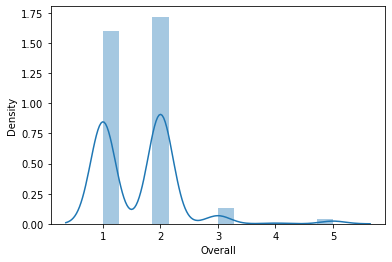

In [150]:
# Distribution of variables
sns.distplot(Films.Overall)
plt.show()

In [151]:
Films.Movie.value_counts()

Willy Wonka                161
Ferris Buellers Day Off    137
Old School                  32
Name: Movie, dtype: int64

In [152]:
Films.corr()

,_rowstate_,Sinage,Parking,Clean,Overall,Age,Income
_rowstate_,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Sinage,NaN,1.000000,0.469180,0.349144,0.382103,-0.089461,-0.036968
Parking,NaN,0.469180,1.000000,0.440771,0.514429,-0.023468,-0.023575
Clean,NaN,0.349144,0.440771,1.000000,0.350822,-0.000114,0.016643
Overall,NaN,0.382103,0.514429,0.350822,1.000000,-0.032904,-0.005568
Age,NaN,-0.089461,-0.023468,-0.000114,-0.032904,1.000000,0.136119
Income,NaN,-0.036968,-0.023575,0.016643,-0.005568,0.136119,1.000000


<AxesSubplot:>

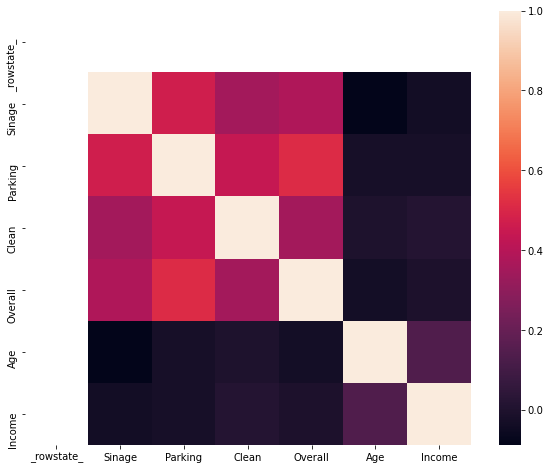

In [153]:
# visualize correlation matrix in Seaborn using a heatmap
plt.figure(figsize = (10, 8))
sns.heatmap(Films.corr())

In [154]:
Films.Marital_Status.value_counts()

2          208
1           88
Single      18
Married     12
Slngle       2
Name: Marital_Status, dtype: int64

In [155]:
Films.Gender.value_counts()

2         194
1         104
Female     19
Male       13
Name: Gender, dtype: int64

In [ ]:
H0 - No relationship
Ha - There is a relationship among the variables

CI - 95%
p - 0.05

In [169]:
obs_freq0 = pd.crosstab( Films.Gender, Films.Overall )

In [170]:
obs_freq0

Overall,1.0,2.0,3.0,4.0,5.0
Gender,,,,,
1,46,51,6,0,1
2,90,96,5,1,2
Female,12,7,0,0,0
Male,3,8,1,0,1


In [171]:
stats.chi2_contingency( obs_freq0 )

(12.505799976178544,
 0.40595925068113825,
 12,
 array([[4.75878788e+01, 5.10545455e+01, 3.78181818e+00, 3.15151515e-01,
         1.26060606e+00],
        [8.87696970e+01, 9.52363636e+01, 7.05454545e+00, 5.87878788e-01,
         2.35151515e+00],
        [8.69393939e+00, 9.32727273e+00, 6.90909091e-01, 5.75757576e-02,
         2.30303030e-01],
        [5.94848485e+00, 6.38181818e+00, 4.72727273e-01, 3.93939394e-02,
         1.57575758e-01]]))

## Chi Square between Sinage and Overall

H0 - No relationship
Ha - There is a relationship among the variables

CI - 95%
p - 0.05

In [163]:
obs_freq1 = pd.crosstab( Films.Sinage, Films.Overall )

In [164]:
obs_freq1

Overall,1.0,2.0,3.0,4.0,5.0
Sinage,,,,,
1.0,90,22,0,0,1
2.0,44,109,4,0,1
3.0,13,25,8,1,1
4.0,2,4,0,0,0
5.0,2,2,0,0,1


In [165]:
stats.chi2_contingency( obs_freq1 )

(125.61859671027881,
 4.53298970003405e-19,
 16,
 array([[5.17060606e+01, 5.54727273e+01, 4.10909091e+00, 3.42424242e-01,
         1.36969697e+00],
        [7.22969697e+01, 7.75636364e+01, 5.74545455e+00, 4.78787879e-01,
         1.91515152e+00],
        [2.19636364e+01, 2.35636364e+01, 1.74545455e+00, 1.45454545e-01,
         5.81818182e-01],
        [2.74545455e+00, 2.94545455e+00, 2.18181818e-01, 1.81818182e-02,
         7.27272727e-02],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02]]))

## Chi Square between Parking and Overall

In [ ]:
H0 - No relationship
Ha - There is a relationship among the variables

CI - 95%
p - 0.05

In [167]:
obs_freq2 = pd.crosstab( Films.Parking, Films.Overall )

In [168]:
obs_freq2

Overall,1.0,2.0,3.0,4.0,5.0
Parking,,,,,
1.0,105,27,2,0,1
2.0,40,111,3,0,1
3.0,4,20,5,0,0
4.0,2,3,1,0,1
5.0,0,1,1,1,1


In [172]:
stats.chi2_contingency( obs_freq2 )

(230.61691663391676,
 4.783162283608494e-40,
 16,
 array([[6.17727273e+01, 6.62727273e+01, 4.90909091e+00, 4.09090909e-01,
         1.63636364e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.32696970e+01, 1.42363636e+01, 1.05454545e+00, 8.78787879e-02,
         3.51515152e-01],
        [3.20303030e+00, 3.43636364e+00, 2.54545455e-01, 2.12121212e-02,
         8.48484848e-02],
        [1.83030303e+00, 1.96363636e+00, 1.45454545e-01, 1.21212121e-02,
         4.84848485e-02]]))

## Chi Square between Clean and Overall

In [ ]:
H0 - No relationship
Ha - There is a relationship among the variables

CI - 95%
p - 0.05

In [176]:
obs_freq3 = pd.crosstab( Films.Clean, Films.Overall )

In [177]:
obs_freq3

Overall,1.0,2.0,3.0,4.0,5.0
Clean,,,,,
1.0,104,35,3,0,2
2.0,39,109,5,1,1
3.0,6,14,4,0,0
4.0,1,4,0,0,0
5.0,1,0,0,0,1


In [178]:
stats.chi2_contingency( obs_freq3 )

(127.71945555999517,
 1.7772535915434025e-19,
 16,
 array([[6.58909091e+01, 7.06909091e+01, 5.23636364e+00, 4.36363636e-01,
         1.74545455e+00],
        [7.09242424e+01, 7.60909091e+01, 5.63636364e+00, 4.69696970e-01,
         1.87878788e+00],
        [1.09818182e+01, 1.17818182e+01, 8.72727273e-01, 7.27272727e-02,
         2.90909091e-01],
        [2.28787879e+00, 2.45454545e+00, 1.81818182e-01, 1.51515152e-02,
         6.06060606e-02],
        [9.15151515e-01, 9.81818182e-01, 7.27272727e-02, 6.06060606e-03,
         2.42424242e-02]]))

## Contingency tables for all Variables 

In [186]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Gender, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Gender,1,2,Female,Male
Movie,,,,
Ferris Buellers Day Off,38.0,67.0,19.0,13.0
Old School,13.0,19.0,NaN,NaN
Willy Wonka,53.0,108.0,NaN,NaN


In [187]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Sinage, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Sinage,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,53.0,64.0,19.0,NaN,1.0
Old School,12.0,13.0,4.0,2.0,1.0
Willy Wonka,48.0,81.0,25.0,4.0,3.0


In [188]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Parking, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Parking,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,54.0,66.0,11.0,5.0,1.0
Old School,17.0,11.0,3.0,NaN,1.0
Willy Wonka,64.0,78.0,15.0,2.0,2.0


In [189]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Clean, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Clean,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,61.0,62.0,12.0,2.0,NaN
Old School,12.0,16.0,3.0,NaN,1.0
Willy Wonka,71.0,77.0,9.0,3.0,1.0


In [190]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Overall, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Overall,1.0,2.0,3.0,4.0,5.0
Movie,,,,,
Ferris Buellers Day Off,59.0,71.0,4.0,1.0,2.0
Old School,21.0,10.0,NaN,NaN,1.0
Willy Wonka,71.0,81.0,8.0,NaN,1.0


In [191]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Income, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Income,1.000000,1.834395,2.000000,3.000000
Movie,,,,
Ferris Buellers Day Off,54.0,7.0,39.0,37.0
Old School,14.0,NaN,7.0,11.0
Willy Wonka,74.0,9.0,36.0,42.0


In [193]:
pd.crosstab( index = Films.Movie, 
                columns = Films.Marital_Status, 
                    values = Films.Gender, 
                        aggfunc = 'count')

Marital_Status,1,2,Married,Single,Slngle
Movie,,,,,
Ferris Buellers Day Off,29.0,76.0,12.0,18.0,2.0
Old School,11.0,20.0,NaN,NaN,NaN
Willy Wonka,48.0,112.0,NaN,NaN,NaN
